##**Autoencoder + Noise Removal using Tensorflow**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load and preprocess Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Add random noise
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define Autoencoder architecture
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return models.Model(input_img, decoded), models.Model(input_img, encoded)

autoencoder, encoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_test_noisy, x_test),
    callbacks=[early_stop]
)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.3898 - val_loss: 0.2946
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2902 - val_loss: 0.2884
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2862 - val_loss: 0.2857
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2840 - val_loss: 0.2837
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2812 - val_loss: 0.2825
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2797 - val_loss: 0.2815
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2787 - val_loss: 0.2807
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2784 - val_loss: 0.2800
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2775 - val_loss: 0.2793
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2768 - val_loss: 0.2791
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2765 - val_loss: 0.2784
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

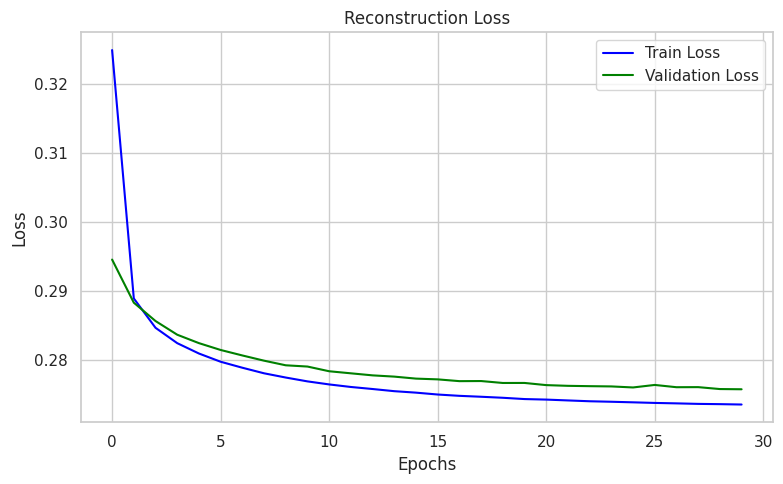

In [5]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Reconstruction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


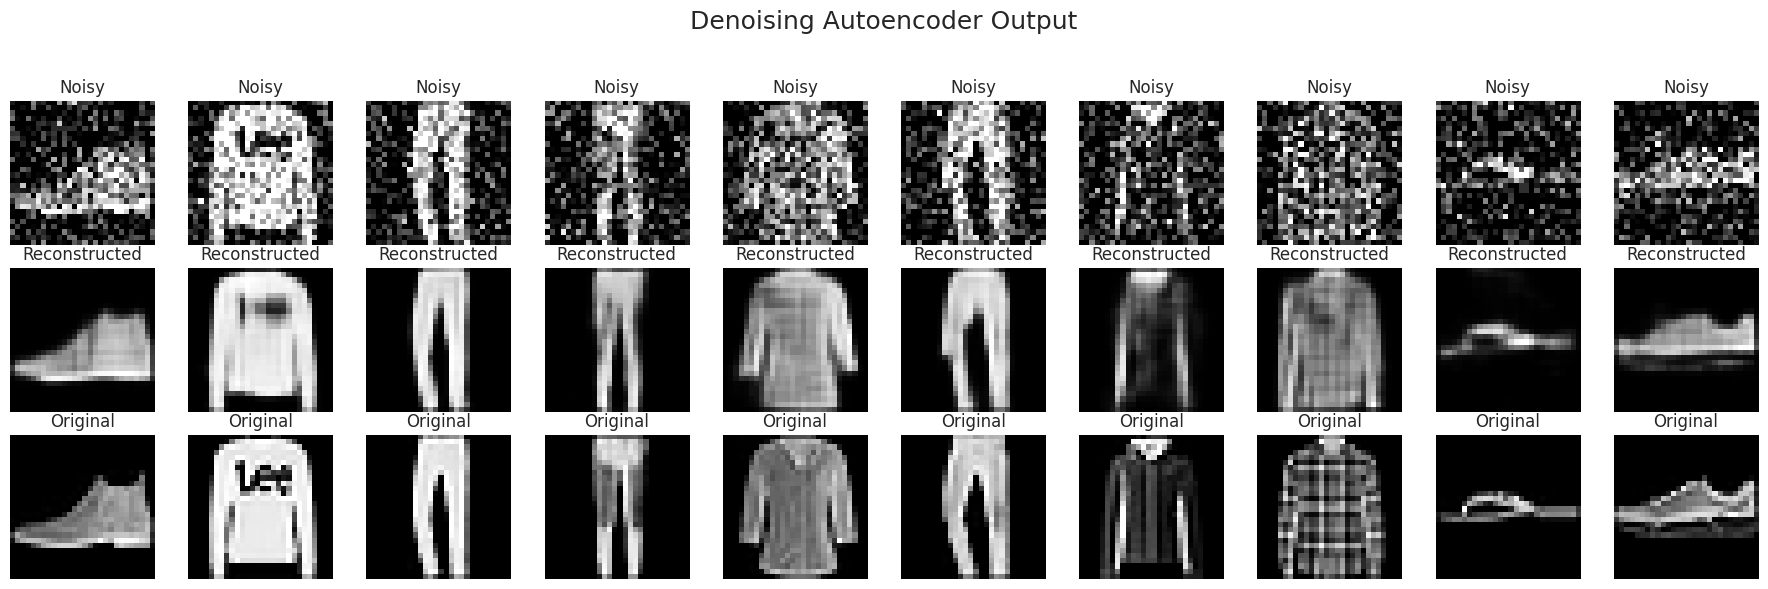

In [6]:
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(18, 6))
for i in range(n):
    # Noisy
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

    # Original
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

plt.suptitle("Denoising Autoencoder Output", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


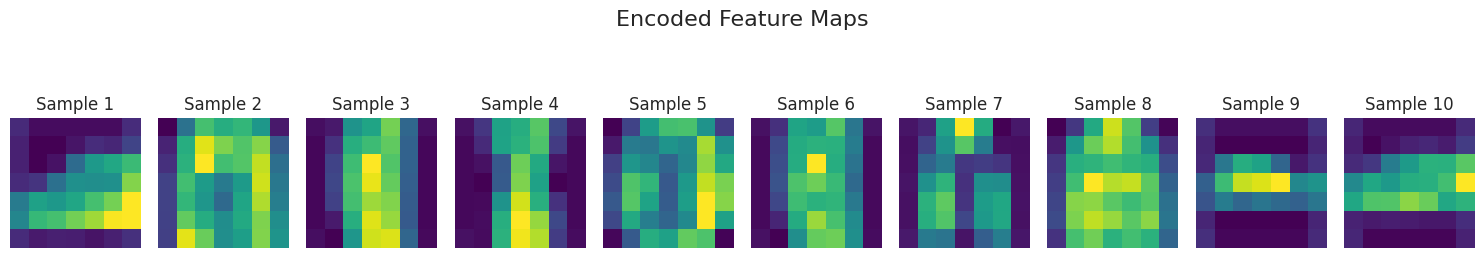

In [7]:
n = 10
encoded_imgs = encoder.predict(x_test[:n])

plt.figure(figsize=(15, 3))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    feature_map = np.mean(encoded_imgs[i], axis=-1)
    plt.imshow(feature_map, cmap='viridis')
    plt.title(f"Sample {i+1}")
    plt.axis("off")
plt.suptitle('Encoded Feature Maps', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


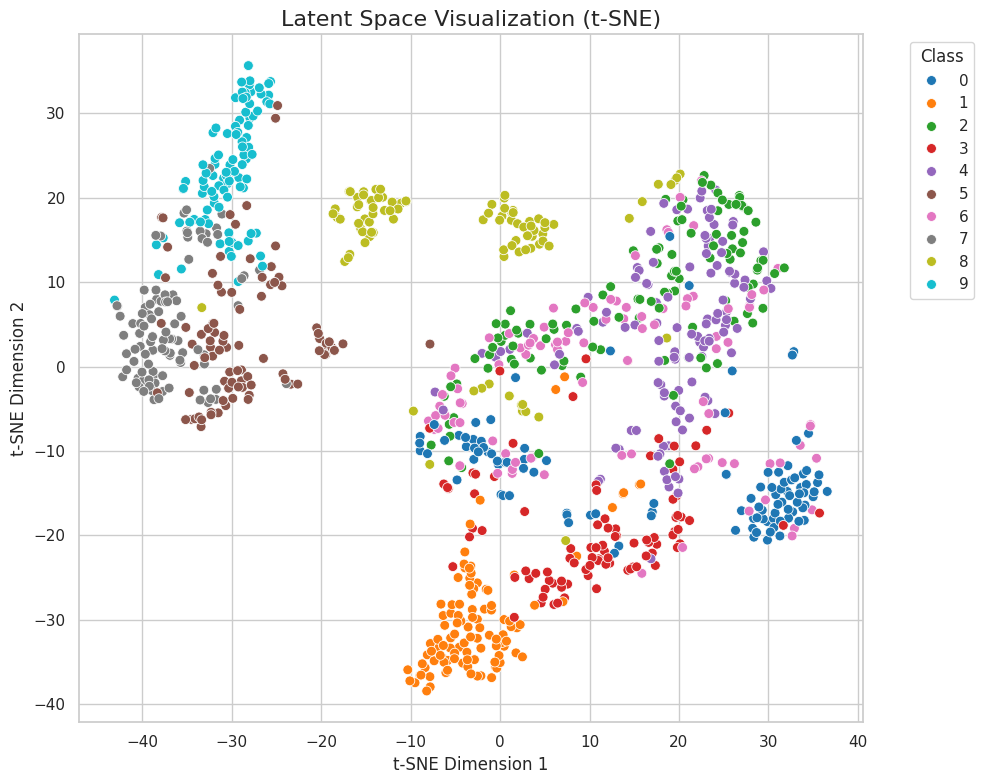

In [8]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Encode 1000 test images
encoded_imgs = encoder.predict(x_test[:1000])

# Flatten feature maps for t-SNE input
encoded_flat = encoded_imgs.reshape(1000, -1)

# Run t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(encoded_flat)

# Scatter plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_result[:, 0], y=tsne_result[:, 1],
    hue=y_test[:1000], palette='tab10', legend='full', s=50
)
plt.title('Latent Space Visualization (t-SNE)', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Summary & Analysis: Convolutional Denoising Autoencoder on Fashion MNIST

## Problem Overview

- **Goal**: Train a convolutional autoencoder to remove noise from Fashion MNIST images.
- **Method**: Add Gaussian noise to input images and train the model to reconstruct clean versions.

## Results

### Reconstruction Loss
- Both training and validation loss steadily decreased.
- No overfitting observed due to early stopping.
- Final validation loss around 0.275.

### Image Restoration
- The model effectively removed noise and restored image details.
- Visual comparison of noisy, reconstructed, and original images confirms good reconstruction quality.

### Latent Space Visualization
- t-SNE plot of encoded outputs shows clear clustering by class.
- Indicates meaningful and discriminative feature learning.

### Feature Map Visualization
- Encoded feature maps show abstract spatial patterns.
- Confirms that the encoder captures useful representations.

## Implications

- Learned features are generalizable and can support classification or clustering.
- The denoising approach is adaptable to other domains such as medical imaging and audio.

## Conclusion

The model demonstrates effective denoising, stable training, and strong generalization, making it a useful tool for unsupervised representation learning and noise reduction.
